# Машинное обучение, ВМК МГУ

# Практическое задание 4. Optimal Control Reinforcement Learning

## Общая информация
Дата выдачи: 30.04.2024

Мягкий дедлайн: 15.05.2024 5:30 MSK

Жёсткий дедлайн: 22.05.2024 5:30 MSK

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). **Максимальная оценка за работу  — 10 баллов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи !!ВАЖНО!!!
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-04-ocrl-Username.ipynb


Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.5 балла за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

## Задание 1 (4 балла): уравнения Рикатти для управления дроном.

Начнем с небольшой разминки: реализация классического алгоритма нахождения оптимального управления для двухмерного дрона. Его динамика уже реализована за вас в файле qudrotor.py. Кроме того, реализована также визуализация его управления.

В качестве описания текущего состояния предлагается использовать вектор из 6-ти элементов [x, dx, y, dy, theta, dtheta]:

*   x - координата центра дрона по x
*   dx - скорость центра дрона по x
*   y - координата центра дрона по y
*   dy - скорость центра дрона по y
*   theta - угол наклона относительно оси x
*   dtheta - угловая скорость

В качестве управления используем вектор из 2 элементов [u1, u2]:

*   u1 - сила тяги левого винта
*   u2 - сила тяги правого винта

Сила измеряется в ньютонах, прикладывается перпендикулярно линии, проведенной между двумя винтами.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import quadrotor
import math
import sympy

Зададим параметы для дальнейшей работы:

In [ ]:
m = 0.6 #масса дрона
r = 0.2 #длина дрона от левого до правого винта
I = 0.15 #инерция
g = 9.81 #ускорение свободного падения
dt = 0.01 #временной шаг

**Задание 1 (0.2 балла):** для начала проверим что все хорошо работает нормально. Реализуйте две функции-контроллера и проверьте их работу. Функции должны принимать на вход текущее состояние и номер таймстепа. Выдавать функции должны управление.

Первая функция должна давать команду ничего не делать (то есть всегда выдавать нулевое управление)

Вторая должна заставлять дрон висеть в воздухе при условии что он появляется в правильном положении параллельно оси x.

In [ ]:
def do_nothing_controller(state, i):
    #ВАШ КОД ЗДЕСЬ
    return u

def stabilize_controller(state, i):
    #ВАШ КОД ЗДЕСЬ
    return u

Проверим реализации. В первом случае дрон должен падать вниз, во втором - висеть в точке (0, 0).

In [ ]:
N = 1000
x0 = np.zeros([quadrotor.NUMBER_STATES,])
t, x, u = quadrotor.simulate(x0, do_nothing_controller, N, disturbance = False)

quadrotor.animate_robot(x, u)

In [ ]:
N = 1000
x0 = np.zeros([quadrotor.NUMBER_STATES,])
t, x, u = quadrotor.simulate(x0, stabilize_controller, N, disturbance = False)

quadrotor.animate_robot(x, u)

**Задание 2 (1.5 баллов):**Как вы помните, уравнения Рикатти как и базовый алгоритм ПМП удобнее всего реализовывать для задачи типа LQR. Однако, она имеет 2 требования, которые не выполняются в нашей задаче.

Требование 1: динамика должна выглядеть следующим образом:
$x_{k+1} = Ax_k + Bu_k$.

Требование 2: функция потерь должна выглядеть следующим образом:
$cost(x,u) = x^TQx + uRu$


Для нашей задачи выписать подобные матрицы в общем случае невозможно. Попробуем нашу динамику аппроксимировать линейной в каждой точке.

Требование 2 не выполняется, так как нам в теории хочется чтобы дрон оказался в конкретной точке. То есть, хочется минимизировать такой лосс: $cost(x,u) = (x-x^*)^TQ(x-x^*) + (u-u^*)^TR(u-u^*)$. Самый простой выход в нашем случае - решать задачу в терминах расстояний до конечной точки (то есть, новый вектор наблюдений - $\overline{x} = (x-x^*), \overline{u}=(u-u^*)$

1. Выпишите аппроксимацию функции (пока без А и В, просто через приращения) $f(x,u)$, где $x_{n+1} = f(x_n, u_n)$. Keywords: второй закон Ньютона, линейное и угловое ускорение стержня, здравый смысл

2. С помощью разложения в ряд Тейлора в окрестности $x^*, u^*$ выведите функцию $\overline{f}: \overline{x}_{n+1} = \overline{f}(\overline{x}_{n}, \overline{u}_{n}) = A\overline{x}_{n} + B\overline{u}_{n}$

3. Запрограммируйте подсчет этих матриц

In [ ]:
def get_linearization(z, u):
    m = 0.6 #масса
    r = 0.2 #длина
    I = 0.15 #инерция
    g = 9.81 #ускорение свободного падения
    dt = 0.01 #временной промежуток

    A = #ваш код здесь
    B = #ваш код здесь
    return A,B

**Задание 2. (0.3 балла)**: теперь перейдем к оптимизируемому функционалу. На семинаре рассматривался функционал как сумма функций потерь для каждой точки.

Не забываем что для удобства вычислений задача решается для относительных состояний и управлений


Ограничим рассматриваемый горизонт 1000 шагами и сгенерируем целевые состояния для каждого момента времени

In [ ]:
from copy import copy

In [ ]:
xstar=[]
for i in range (0,1000):
    if i >=0 and i <= 450:
        goal=np.array([[3],[0],[3],[0],[0],[0]]) # хотим чтобы за первые 450 шагов он оказался в точке (3,3)
        xstar.append(copy(goal))
    if i>=451 and i <= 550:
        goal=np.array([[3],[0],[3],[0],[np.pi/2],[0]]) # теперь говорим ему встасть перпендикулярно оси х чтобы дестабилизировать свое положение
        xstar.append(copy(goal))
    if i>=551 and i <= 1000:
        goal=np.array([[0],[0],[0],[0],[0],[0]]) # говорим ему вернуться на исходную позицию
        xstar.append(copy(goal))
xstar = np.array(xstar).reshape(1000,6,).T
xstar.shape

(6, 1000)

По умолчанию мы хотим чтобы дрон висел стабильно в воздухе, поэтому $u^*$ - это управление-стабилизатор.

Реализуйте функцию подсчета потерь по формулам с семинара. $Q$ возьмите равной $I*10000, R = I*0.0001$

In [ ]:
def cost_function(x,u):

    cost = #ваш код здесь
    return cost

**Задание 3. (2 балла):** реализуйте полный прогон уравнений Рикатти для 1000 шагов. Вам понадобится получасть матрицы A и B на каждом шаге для вычисления управления. Функция должна возвращать список из матриц K и P.

In [ ]:
def back_Riccati(prev,curr,u):
    N = 1000
    #ваш код здесь
    return K, P

In [ ]:
K, P = #ваш код здесь

Реализуйте генерацию управления с помощью полученного массива матриц K. Помните что мы решаем задачу в терминах относительного состояния и аппроксимированных матриц A и B. Поэтому, к вычисленному по формулам с семинара управлению требуется прибавить стабилизатор.

In [ ]:
u = #ваш код здесь

Проверьте управление. Для получения полного балла необходимо чтобы дрон прилетал  в точку (3, 3), и возвращался в (0, 0). ВЕКТОР ЦЕЛЕВЫХ СОСТОЯНИЙ xstar МЕНЯТЬ ЗАПРЕЩЕНО

In [ ]:
quadrotor.animate_robot(state, u)

## Задание 2 (6 баллов): уравнение Беллмана

Теперь рассмотрим 1 из популярных в наши дни методов обучения с подкреплением: A2C. Для реализиции будем использовать популярную в наше время библиотеку RL-щиков [gymnasium](https://gymnasium.farama.org/content/basic_usage/).

Произведем настройку окружения

In [ ]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

Selecting previously unselected package libfontenc1:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../0-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-1build3) ...
Selecting previously unselected package libxfont2:amd64.
Preparing to unpack .../1-libxfont2_1%3a2.0.5-1build1_amd64.deb ...
Unpacking libxfont2:amd64 (1:2.0.5-1build1) ...
Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../2-libxkbfile1_1%3a1.1.0-1build3_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.1.0-1build3) ...
Selecting previously unselected package x11-xkb-utils.
Preparing to unpack .../3-x11-xkb-utils_7.7+5build4_amd64.deb ...
Unpacking x11-xkb-utils (7.7+5build4) ...
Selecting previously unselected package xfonts-encodings.
Preparing to unpack .../4-xfonts-encodings_1%3a1.0.5-0ubuntu2_all.deb ...
Unpacking xfonts-encodings (1:1.0.5-0ubuntu2) ...
Selecting previously unselected package xfonts-util

In [ ]:
!pip install swig
!pip install gymnasium[toy_text,classic_control,box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376100 sha256=16097b05a5d7f25c9d4887c3684e14c69cb8ef09fb5b3c8fd71e3c226ed0225f
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


Алгоритм будем исследовать на примере задачи [cartpole](https://gymnasium.farama.org/environments/classic_control/cart_pole/).

gymnasium предоставляет возможность работать с симуляциями окружающих сред для разных задач. Прочитайте комментарии к коду в следующей ячейке.

Выход функции step: (array([-0.0128429 , -0.17671344,  0.03749534,  0.29536232], dtype=float32), 1.0, False, False, {})
state vector dim = 4
n_actions = 2


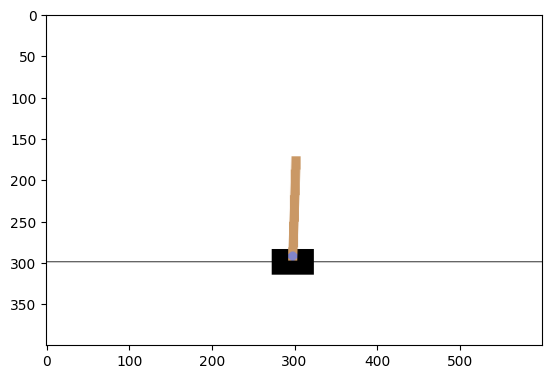

In [ ]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import gymnasium as gym

# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("CartPole-v0", render_mode="rgb_array").env # так создается симулятов окружения

env.reset() # сбрасываем параметры симулятора (устанавливаем прошедшее всемя с начала эпизода на 0, накопленную награду на 0, сбрасываются параметры инерции)
n_actions = env.action_space.n # получаем количество возможных действий управления
state_dim = env.observation_space.shape[0] # получаем размерность вектора наблюдений
print('Выход функции step:', env.step(0)) #для того чтобы сделать шаг симуляции есть функция step, принимающая на вход действие и возвращающая следующее состояние, награду, индикатор окончания эпизода и дополнительную иннформацию
plt.imshow(env.render()) #render отрисовывает окружающую среду в формате пригодном для подачи в функцию imshow
print("state vector dim =", state_dim)
print("n_actions =", n_actions)

env.close() #останавливаем симуляцию

In [ ]:
import os
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

Напомним суть метода A2C:

Есть 2 нейронный сети: Actor и Critic. Critic - по-сути функция Беллмана, которую обучают под дискретное уравнение Беллмана.

Actor - политика, которую мы обучает максимизировать функцию Беллмана.



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

Создайте 2 вышеупомянутые нейросети. Для нашей задачи хватит 2-3 линейных слоя в каждой. Так как пространство действий дискретно, вам  надо будет пробросить градиент через семплирование с вероятностями. В этом вам поможет torch.distributions.Categorical как возвращаемое значение Actor

In [ ]:
class Actor(nn.Module):
    def __init__(self, state_size, action_size):
        super(Actor, self).__init__()
        #ваш код здесь

    def forward(self, state):
        #ваш код здесь


class Critic(nn.Module):
    def __init__(self, state_size, action_size):
        super(Critic, self).__init__()
        #ваш код здесь

    def forward(self, state):
        #ваш код здесь


Теперь для удобства реализуем функцию compute_returns, вычисляющую значения Q - функции. На вход она получает список rewards наград, получаемых на каждом шаге куска траектории, next_state - выход критика в последнем состоянии таектории. При обучении мы будем последовательно генерировать кусок траектории фиксированной длины (из соображений удобства). На выходе вы должны получить оценку Q-функции. Нам никто не гарантирует что эпизод не закончится раньше чем закончится генерция траектории. Например, N = 20, а на 10 эпизоде у нас маятник уже упал. gymnasium в таком случае автоматически запускает новый эпизод и при следующем вызове step эпизод будет уже новый. Для этого, в функцию передается параметр dones, являющийся списком длины N, содержащий индикаторы того, завершился ли эпизод на соответствующем шаге. Соответственно, для оценок Q-функции на куске уже траектории, известной до последнего эпизода, прибавлять V-функцию не нужно, так как мы и так знаем все награды до самого конца.

Реализуйте функцию compute_returns.

In [ ]:
def compute_Q(next_value, rewards, dones, gamma=0.99):
    #ваш код здесь

Теперь реализуйте итерацию обучения. Напомним формулы:


$L_{actor} = -\frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N log(π(a_t^m|s_t^m))A(a_t^m, s_t^m)$

$L_{critic} = \frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N (V(s_t^m) - y(s_t^m, a_t^m))^2$

$y(s_t^m, a_t^m) = \sum_{t'=t}^{N-1} γ^{t'-t} r(s_{t'}, a_{t'}) + γ^{N-t} V(s_N) $

In [ ]:
def trainIters(actor, critic, n_iters):
    #создайте оптимизаторы для Actor и Critic
    optimizerActor = #ваш код здесь
    optimizerCritic = #ваш код здесь

    for iter in range(n_iters):
        #обнулите окружение и получите первое состояние
        state = #ваш код здесь
        #переменные для накопления всего накапливаемого
        log_probs = []
        values = []
        rewards = []
        dones = []

        #цикл по шагам в эпизоде
        for #ваш код здесь
            env.render()

            #получите действие и значение V - функции в текущем состоянии state
            #ваш код здесь

            #шаг симулятора
            next_state, reward, done, truncated, _ = #ваш код здесь

            #накапливаем логарифмы вероятностей, значения v-функции, действия, награды, индикаторы завершения эпизода
            #ваш код здесь

            if done:
                print('Iteration: {}, Score: {}'.format(iter, i))


        #получите значение V - функции в последнем состоянии (параметр next_state)
        #ваш код здесь

        #вычислите Q-функции
        #ваш код здесь

        #вычислите advantage
        advantage = #ваш код здесь

        #вычислите actor_loss
        actor_loss = #ваш код здесь

        #вычислите critic_loss
        critic_loss = #ваш код здесь

        #сделайте шаг оптимизации critic_loss
        #ваш код здесь

    torch.save(actor, 'actor.pkl')
    torch.save(critic, 'critic.pkl')
    env.close()

actor = Actor(state_size, action_size).to(device)
critic = Critic(state_size, action_size).to(device)
trainIters(actor, critic, n_iters=500)

Проверьте обученные сети. Награда после завершения эпизода должна быть стабильно больше 300. Можно менять количество эпох обучения

In [1]:
#для тестирования скопируйте цикл for из предыдущей ячейки сюда, удалите логгирования, замените range(N) на count() (тогда он будет бесконечно итерироваться) и в if done запихните break.
#Прогонить эпизод несколько раз

Реализуем функцию для записи траекторий.

In [ ]:
def generate_session(env, agent, t_max=1000):
    """
    Play a single game using agent neural network.
    Terminate when game finishes or after :t_max: steps
    """
    states, actions = [], []
    total_reward = 0

    s = env.reset()[0]

    for t in range(t_max):
        a = #получите следующее действие

        new_s, r, terminated, truncated, _ = #шаг симуляции

        # накаливаем траекторию
        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if terminated or truncated:
            break
    return states, actions, total_reward

Запишем видео работы сетей (парочку видео приложите в  энитаск)

In [ ]:
from gymnasium.wrappers import RecordVideo

with RecordVideo(
    env=gym.make("CartPole-v0", render_mode="rgb_array"),
    video_folder="./videos",
    episode_trigger=lambda episode_number: True,
) as env_monitor:
    sessions = [generate_session(env_monitor, actor) for _ in range(100)]

Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4
Moviepy - Building video /content/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-1.mp4
Moviepy - Building video /content/videos/rl-video-episode-2.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-2.mp4
Moviepy - Building video /content/videos/rl-video-episode-3.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-3.mp4
Moviepy - Building video /content/videos/rl-video-episode-4.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-4.mp4
Moviepy - Building video /content/videos/rl-video-episode-5.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-5.mp4
Moviepy - Building video /content/videos/rl-video-episode-6.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-6.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-6.mp4
Moviepy - Building video /content/videos/rl-video-episode-7.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-7.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-7.mp4
Moviepy - Building video /content/videos/rl-video-episode-8.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-8.mp4
Moviepy - Building video /content/videos/rl-video-episode-9.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-9.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-9.mp4
Moviepy - Building video /content/videos/rl-video-episode-10.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-10.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-10.mp4
Moviepy - Building video /content/videos/rl-video-episode-11.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-11.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-11.mp4
Moviepy - Building video /content/videos/rl-video-episode-12.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-12.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-12.mp4
Moviepy - Building video /content/videos/rl-video-episode-13.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-13.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-13.mp4
Moviepy - Building video /content/videos/rl-video-episode-14.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-14.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-14.mp4
Moviepy - Building video /content/videos/rl-video-episode-15.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-15.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-15.mp4
Moviepy - Building video /content/videos/rl-video-episode-16.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-16.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-16.mp4
Moviepy - Building video /content/videos/rl-video-episode-17.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-17.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-17.mp4
Moviepy - Building video /content/videos/rl-video-episode-18.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-18.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-18.mp4
Moviepy - Building video /content/videos/rl-video-episode-19.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-19.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-19.mp4
Moviepy - Building video /content/videos/rl-video-episode-20.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-20.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-20.mp4
Moviepy - Building video /content/videos/rl-video-episode-21.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-21.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-21.mp4
Moviepy - Building video /content/videos/rl-video-episode-22.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-22.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-22.mp4
Moviepy - Building video /content/videos/rl-video-episode-23.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-23.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-23.mp4
Moviepy - Building video /content/videos/rl-video-episode-24.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-24.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-24.mp4
Moviepy - Building video /content/videos/rl-video-episode-25.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-25.mp4
Moviepy - Building video /content/videos/rl-video-episode-26.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-26.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-26.mp4
Moviepy - Building video /content/videos/rl-video-episode-27.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-27.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-27.mp4
Moviepy - Building video /content/videos/rl-video-episode-28.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-28.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-28.mp4
Moviepy - Building video /content/videos/rl-video-episode-29.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-29.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-29.mp4
Moviepy - Building video /content/videos/rl-video-episode-30.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-30.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-30.mp4
Moviepy - Building video /content/videos/rl-video-episode-31.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-31.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-31.mp4
Moviepy - Building video /content/videos/rl-video-episode-32.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-32.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-32.mp4
Moviepy - Building video /content/videos/rl-video-episode-33.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-33.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-33.mp4
Moviepy - Building video /content/videos/rl-video-episode-34.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-34.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-34.mp4
Moviepy - Building video /content/videos/rl-video-episode-35.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-35.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-35.mp4
Moviepy - Building video /content/videos/rl-video-episode-36.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-36.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-36.mp4
Moviepy - Building video /content/videos/rl-video-episode-37.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-37.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-37.mp4
Moviepy - Building video /content/videos/rl-video-episode-38.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-38.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-38.mp4
Moviepy - Building video /content/videos/rl-video-episode-39.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-39.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-39.mp4
Moviepy - Building video /content/videos/rl-video-episode-40.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-40.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-40.mp4
Moviepy - Building video /content/videos/rl-video-episode-41.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-41.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-41.mp4
Moviepy - Building video /content/videos/rl-video-episode-42.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-42.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-42.mp4
Moviepy - Building video /content/videos/rl-video-episode-43.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-43.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-43.mp4
Moviepy - Building video /content/videos/rl-video-episode-44.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-44.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-44.mp4
Moviepy - Building video /content/videos/rl-video-episode-45.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-45.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-45.mp4
Moviepy - Building video /content/videos/rl-video-episode-46.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-46.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-46.mp4
Moviepy - Building video /content/videos/rl-video-episode-47.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-47.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-47.mp4
Moviepy - Building video /content/videos/rl-video-episode-48.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-48.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-48.mp4
Moviepy - Building video /content/videos/rl-video-episode-49.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-49.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-49.mp4
Moviepy - Building video /content/videos/rl-video-episode-50.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-50.mp4
Moviepy - Building video /content/videos/rl-video-episode-51.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-51.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-51.mp4
Moviepy - Building video /content/videos/rl-video-episode-52.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-52.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-52.mp4
Moviepy - Building video /content/videos/rl-video-episode-53.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-53.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-53.mp4
Moviepy - Building video /content/videos/rl-video-episode-54.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-54.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-54.mp4
Moviepy - Building video /content/videos/rl-video-episode-55.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-55.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-55.mp4
Moviepy - Building video /content/videos/rl-video-episode-56.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-56.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-56.mp4
Moviepy - Building video /content/videos/rl-video-episode-57.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-57.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-57.mp4
Moviepy - Building video /content/videos/rl-video-episode-58.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-58.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-58.mp4
Moviepy - Building video /content/videos/rl-video-episode-59.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-59.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-59.mp4
Moviepy - Building video /content/videos/rl-video-episode-60.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-60.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-60.mp4
Moviepy - Building video /content/videos/rl-video-episode-61.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-61.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-61.mp4
Moviepy - Building video /content/videos/rl-video-episode-62.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-62.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-62.mp4
Moviepy - Building video /content/videos/rl-video-episode-63.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-63.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-63.mp4
Moviepy - Building video /content/videos/rl-video-episode-64.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-64.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-64.mp4
Moviepy - Building video /content/videos/rl-video-episode-65.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-65.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-65.mp4
Moviepy - Building video /content/videos/rl-video-episode-66.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-66.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-66.mp4
Moviepy - Building video /content/videos/rl-video-episode-67.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-67.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-67.mp4
Moviepy - Building video /content/videos/rl-video-episode-68.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-68.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-68.mp4
Moviepy - Building video /content/videos/rl-video-episode-69.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-69.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-69.mp4
Moviepy - Building video /content/videos/rl-video-episode-70.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-70.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-70.mp4
Moviepy - Building video /content/videos/rl-video-episode-71.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-71.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-71.mp4
Moviepy - Building video /content/videos/rl-video-episode-72.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-72.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-72.mp4
Moviepy - Building video /content/videos/rl-video-episode-73.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-73.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-73.mp4
Moviepy - Building video /content/videos/rl-video-episode-74.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-74.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-74.mp4
Moviepy - Building video /content/videos/rl-video-episode-75.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-75.mp4
Moviepy - Building video /content/videos/rl-video-episode-76.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-76.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-76.mp4
Moviepy - Building video /content/videos/rl-video-episode-77.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-77.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-77.mp4
Moviepy - Building video /content/videos/rl-video-episode-78.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-78.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-78.mp4
Moviepy - Building video /content/videos/rl-video-episode-79.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-79.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-79.mp4
Moviepy - Building video /content/videos/rl-video-episode-80.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-80.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-80.mp4
Moviepy - Building video /content/videos/rl-video-episode-81.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-81.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-81.mp4
Moviepy - Building video /content/videos/rl-video-episode-82.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-82.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-82.mp4
Moviepy - Building video /content/videos/rl-video-episode-83.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-83.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-83.mp4
Moviepy - Building video /content/videos/rl-video-episode-84.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-84.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-84.mp4
Moviepy - Building video /content/videos/rl-video-episode-85.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-85.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-85.mp4
Moviepy - Building video /content/videos/rl-video-episode-86.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-86.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-86.mp4
Moviepy - Building video /content/videos/rl-video-episode-87.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-87.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-87.mp4
Moviepy - Building video /content/videos/rl-video-episode-88.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-88.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-88.mp4
Moviepy - Building video /content/videos/rl-video-episode-89.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-89.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-89.mp4
Moviepy - Building video /content/videos/rl-video-episode-90.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-90.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-90.mp4
Moviepy - Building video /content/videos/rl-video-episode-91.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-91.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-91.mp4
Moviepy - Building video /content/videos/rl-video-episode-92.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-92.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-92.mp4
Moviepy - Building video /content/videos/rl-video-episode-93.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-93.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-93.mp4
Moviepy - Building video /content/videos/rl-video-episode-94.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-94.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-94.mp4
Moviepy - Building video /content/videos/rl-video-episode-95.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-95.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-95.mp4
Moviepy - Building video /content/videos/rl-video-episode-96.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-96.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-96.mp4
Moviepy - Building video /content/videos/rl-video-episode-97.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-97.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-97.mp4
Moviepy - Building video /content/videos/rl-video-episode-98.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-98.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-98.mp4
Moviepy - Building video /content/videos/rl-video-episode-99.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-99.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-99.mp4
